# The Sparks Foundation - Computer Vision & Internet of Things
##### Topic : Deetection of face mask.
##### Task 4 : Implement a real time face mask detector.
##### Author : Nidhi Pandya

## Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

## Reading an image and converting BGR to RGB format

In [2]:
img_array = cv2.imread("Dataset/Mask/00000_Mask.jpg")


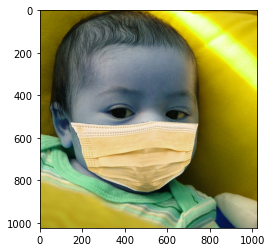

In [3]:
## BGR format
plt.imshow(img_array)

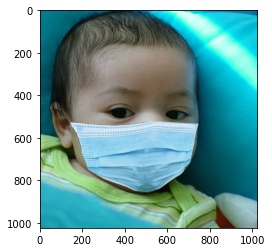

In [4]:
## Convert BGR to RGB
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [5]:
# height px, width px, RGB
img_array.shape

(1024, 1024, 3)

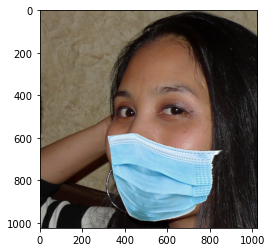

In [4]:
Datadirectory = "Dataset/" ## Training dataset
Classes = ["Mask","No_mask"] ## List of Classes
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

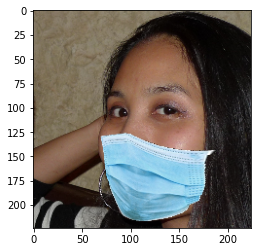

In [5]:
img_size = 224 ## ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

## Reading the images and converting all into an array

In [6]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) # 0 1    ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

1950


In [10]:
# Prevent ovefitting problem by shuffling the data
import random 
random.shuffle(training_data)

In [11]:
X = [] ## Data/Features
y = [] ## Label

for features, label in training_data:
    X.append(features)
    y.append(label)
    
## -1 means the size of all images
## x => Converting list into numpy array before deep learning architecture 
X = np.array(X).reshape(-1, img_size, img_size, 3)


In [12]:
X.shape

(1950, 224, 224, 3)

In [13]:
## Normalising the data (you can use scikit learn library too)
## Max gray level = 255. So..
X = X/255.0

In [14]:
Y = np.array(y)

In [15]:
## Saving the data
import pickle
 
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)

## Deep Learning model for training ---> Transfer Learning

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()  ## pre-trained model

In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

## Transfer Learning - Tuning, weights will start from last check point

In [20]:
### We have to modify last 3 layers
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Setting for Binary Classification ( Mask / No Mask)

In [25]:
new_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
new_model.fit(X,y, epochs = 5, validation_split = 0.1)

Epoch 1/5
55/55 [==============================] - 115s 2s/step - loss: 0.0311 - accuracy: 0.9875 - val_loss: 0.4068 - val_accuracy: 0.9487
Epoch 2/5
55/55 [==============================] - 112s 2s/step - loss: 0.0182 - accuracy: 0.9954 - val_loss: 7.7702e-11 - val_accuracy: 1.0000
Epoch 3/5
55/55 [==============================] - 486s 9s/step - loss: 4.1573e-05 - accuracy: 1.0000 - val_loss: 6.3323e-12 - val_accuracy: 1.0000
Epoch 4/5
55/55 [==============================] - 113s 2s/step - loss: 9.0845e-05 - accuracy: 1.0000 - val_loss: 1.0558e-11 - val_accuracy: 1.0000
Epoch 5/5
55/55 [==============================] - 107s 2s/step - loss: 6.0252e-06 - accuracy: 1.0000 - val_loss: 9.9081e-10 - val_accuracy: 1.0000


In [30]:
new_model.save("model.h5") 

In [26]:
new_model = tf.keras.models.load_model('model.h5')

## Checking the network for Predictions

In [27]:
frame = cv2.imread("Dataset/Mask/00002_Mask.jpg")

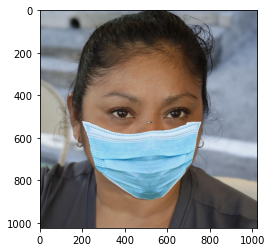

In [28]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [29]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need 4th dimension
final_image = final_image/255.0

In [30]:
Predictions = new_model.predict(final_image)
Predictions

array([[1.02135544e-13]], dtype=float32)

In [31]:
## Taking unknown image 
frame = cv2.imread("12.jpg")

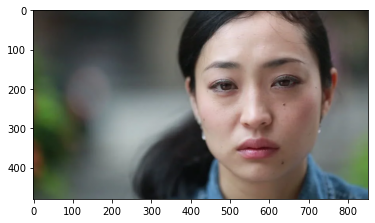

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [33]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [34]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [35]:
gray.shape

(480, 852)

In [36]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex+ew]

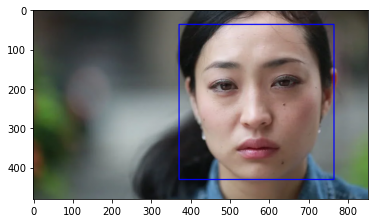

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

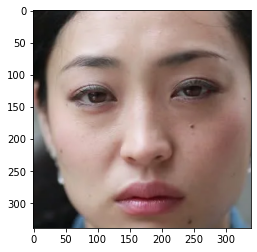

In [38]:
## Cropped face
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [39]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need 4th dimension
final_image = final_image/255.0

In [40]:
# 1 for no mask
Predictions = new_model.predict(final_image)
Predictions

array([[1.]], dtype=float32)

## Real-time video demo

# Face Mask Detection

In [ ]:
import cv2 

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN


## Set Rectangle backGround to white
rectangle_bgr = (255,255,255)

## Make a black image
img = np.zeros((500,500))

## Set some text
text = "Some text in box"
## Get width, height of textbox
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

## Set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

## make the coords of the box with padding of 2px
box_coords = ((text_offset_x,text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0) , thickness = 1)

cap = cv2.VideoCapture(0)
cv2.namedWindow("FACE MASK DETECTION")
# cap = cv2.VideoCapture(1)
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     ("Can't open webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ew]


    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) ## need 4th dimension
    final_image = final_image/255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN


    if (Predictions == 1):
        status = "No Mask"

        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black bg rectangle

        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        ## Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2) ), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 7, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    else:  
        status = "Mask"

        x1,y1,w1,h1 = 0,0,175,75
        ## Draw black bg rectangle

        cv2.rectangle(frame, (x1,y1), (x1+w1, y1+h1), (0,0,0), -1)
        ## Add text


        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2) ), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        cv2.putText(frame, status, (100,150), font, 7, (0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))


    cv2.imshow("FACE MASK DETECTION", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Task 4 completed!